# Analyzing NYTbd Sample 6
<br>
This notebook is looking at the NYTbd Sample 6 content analyzed by ACCENT and PETRARCH2 to identify current limitations with PETRARCH2 and to try and devise solutions. 

In [1]:
# Setup Environment
import nltk

from nltk.parse.corenlp import CoreNLPServer
from nltk.parse.corenlp import CoreNLPDependencyParser
from nltk.parse import CoreNLPParser

import pandas as pd

import pprint

from nltk.tree import *
from IPython.display import display

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Link to Java Server for Standford CoreNLP
<br>
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -annotators "tokenize,ssplit,pos,lemma,parse,sentiment" -port 9000 -timeout 100000

In [55]:
# Connect to Server
parser = CoreNLPParser('http://localhost:9000')
depr = CoreNLPDependencyParser('http://localhost:9000')

#### Write Some Functions for Parsing Text

In [2]:
# Core Parser- save as df['parsed']
def core_parser(df, col):
    parse = []
    i = ""
    for i in range(len(df)):
        parse.append(i)
        parse[i] = next(parser.raw_parse(df[col].iloc[i]))
    return parse

# Dependency Parser- save as df['dep']
def dep_parser(df, col):
    dep = []
    i = ""
    for i in range(len(df)):
        dep.append(i)
        dep[i] = next(depr.raw_parse(df[col].iloc[i]))
    return dep

# For easy display of both parse trees, text, and code
def easy_read(corp, index_num):
    display(corp['parsed'].iloc[index_num])
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    
# function to display only constituency parse with POS tags with text and code
def parsed_output(corp, index_num):
    display("AID = " + str(corp.iloc[index_num].loc['aid']))
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    display("Text = " + corp.iloc[index_num].loc['text'])
    display(corp['parsed'].iloc[index_num])

# function to display only dependency parse with text and code
def dependency_output(corp, index_num):
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    
# function to display constituency parse of a single sentence
def one_sentence_parser(text):
    output = next(parser.raw_parse(text))
    return output

## Read in NYTbd Sample 6 Data- ACCENT and PETRARCH

In [3]:
accent6 = pd.read_stata("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 6/Run1/Accent_sample6_events_text.dta")
petrarch6_full = pd.read_stata("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 6/Run1/NYTbd_sample6_run1_events_text.dta")

In [4]:
# Convert Data Types to int32
petrarch6_full['code'] = petrarch6_full['code'].astype('int32')
petrarch6_full['aid'] = petrarch6_full['aid'].astype('int32')

accent6['code'] = accent6['code'].astype('int32')
accent6['aid'] = accent6['aid'].astype('int32')

# extract relevant_codes from accent6
relevant_codes = accent6.code.unique()

# trim petrarch6_full down to relevant codes
petrarch6 = petrarch6_full[petrarch6_full['code'].isin(relevant_codes)]

## Parse Text

In [6]:
%time 
accent6['parsed'] = core_parser(accent6, 'text')
accent6['dep'] = dep_parser(accent6, 'text')

petrarch6['parsed'] = core_parser(petrarch6, 'text')
petrarch6['dep'] = dep_parser(petrarch6, 'text')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


/Users/jonathanbonaguro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/jonathanbonaguro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
keys = list(['aid', 'code'])
accent6_index = accent6.set_index(keys).index
petrarch6_index = petrarch6.set_index(keys).index

# Produce df's of mutually exclusive events 
accent6_only = accent6[~accent6_index.isin(petrarch6_index)]
petrarch6_only = petrarch6[~petrarch6_index.isin(accent6_index)]

# Produce df's of same article, same coding
accent6_same_code = accent6[accent6_index.isin(petrarch6_index)]
petrarch6_same_code = petrarch6[petrarch6_index.isin(accent6_index)]

# sort values on AID and reset index 
accent6_only = accent6_only.sort_values('aid').reset_index(drop = True)
petrarch6_only = petrarch6_only.sort_values('aid').reset_index(drop = True)

accent6_same_code = accent6_same_code.sort_values('aid').reset_index(drop = True)
petrarch6_same_code = petrarch6_same_code.sort_values('aid').reset_index(drop = True)

In [6]:
accent6_only.to_csv("Data/accent6_only.csv")

## Look for errors in ACCENT and remove from data
<br>
Event codes: 1711, 1712, 1724, 182, 1821, 1822, 1823, 185, 186

In [8]:
# for i in range(len(accent6_only[accent6_only.code == 182])):
#     parsed_output(accent6_only[accent6_only.code == 182], i)
#     display(i)

In [17]:
# trim errors out of ACCENT output : refer to "ACCENT_SAMPLE5_ERRORS.docx" for documentation of errors
accent6_1711 = accent6_only[accent6_only.code == 1711].reset_index(drop = True).drop([1, 2, 3, 4, 11, 12, 23]).reset_index(drop = True)

accent6_1712 = accent6_only[accent6_only.code == 1712].reset_index(drop = True).drop([0, 2, 7, 8, 9, 15, 18]).reset_index(drop = True)

accent6_1724 = accent6_only[accent6_only.code == 1724].reset_index(drop = True)

accent6_182 = accent6_only[accent6_only.code == 182].reset_index(drop = True).drop([3, 4, 8, 9, 10, 11, 12, 13, 14, 15, 18, 22, 23, 24]).reset_index(drop = True)

accent6_1821 = accent6_only[accent6_only.code == 1821].reset_index(drop = True)

accent6_1822 = accent6_only[accent6_only.code == 1822].reset_index(drop = True).drop([0]).reset_index(drop = True)

accent6_1823 = accent6_only[accent6_only.code == 1823].reset_index(drop = True).drop([10, 12]).reset_index(drop = True)

accent6_185 = accent6_only[accent6_only.code == 185].reset_index(drop = True)

accent6_186 = accent6_only[accent6_only.code == 186].reset_index(drop = True).drop([1, 2, 7, 15, 18]).reset_index(drop = True)

## Print ACCENT Output to Identify Dictionary Improvements

'AID = 2707204'

'Code = 186'

'Text = ""At the end, the hospital and the Glen became the same project for us,"" Mr Petitto said.\\n\\nThe filmmakers also interview Ahmed Shah Mas soud, the ""lion of Panjshu; \' a  leader killed on Sept. 9 by assassins believed to be associates of Osama bin Laden.'

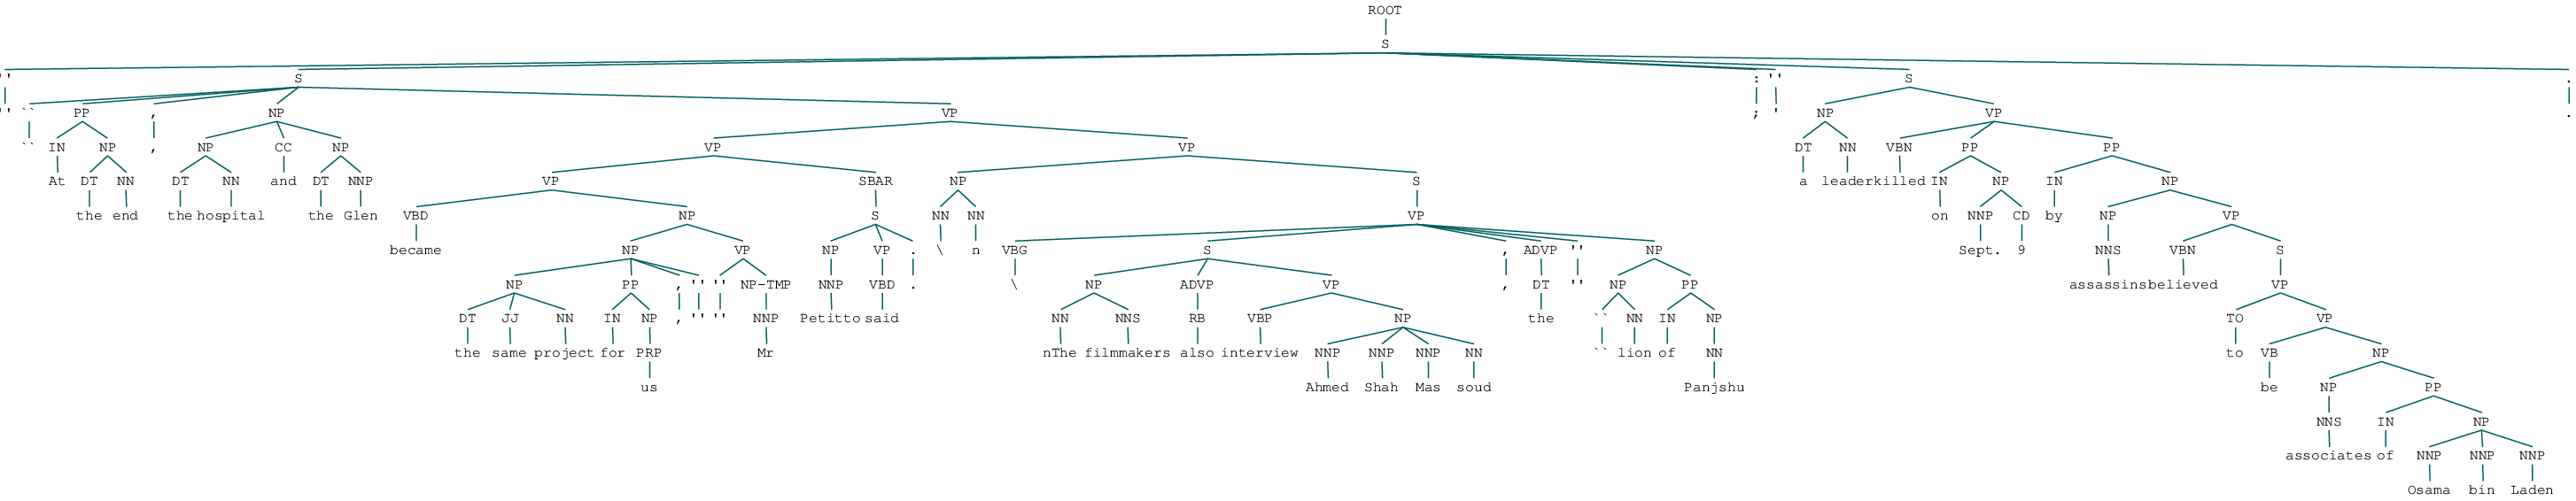

0

'AID = 22533036'

'Code = 186'

'Text = On Nov. 28, 1971, the Prime Minister of Jordan, Wasfi Tell, was assassinated outside the Cairo Sheraton by Palestinian gunmen.'

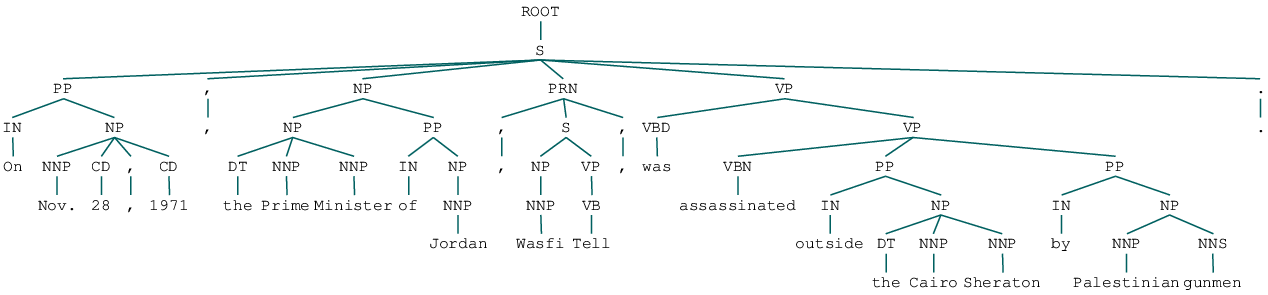

1

'AID = 22549058'

'Code = 186'

'Text =  imposed on Oct. 6, 1981, the day President Anwar el-Sadat was assassinated by Moslem fundamentalists, is a certainty because the Government has a majority in Parliament.\\nThe Interior Minister said that last February a foreign terrorist organization was rounded up in Cairo and found to possess some 496 pounds of explosives.'

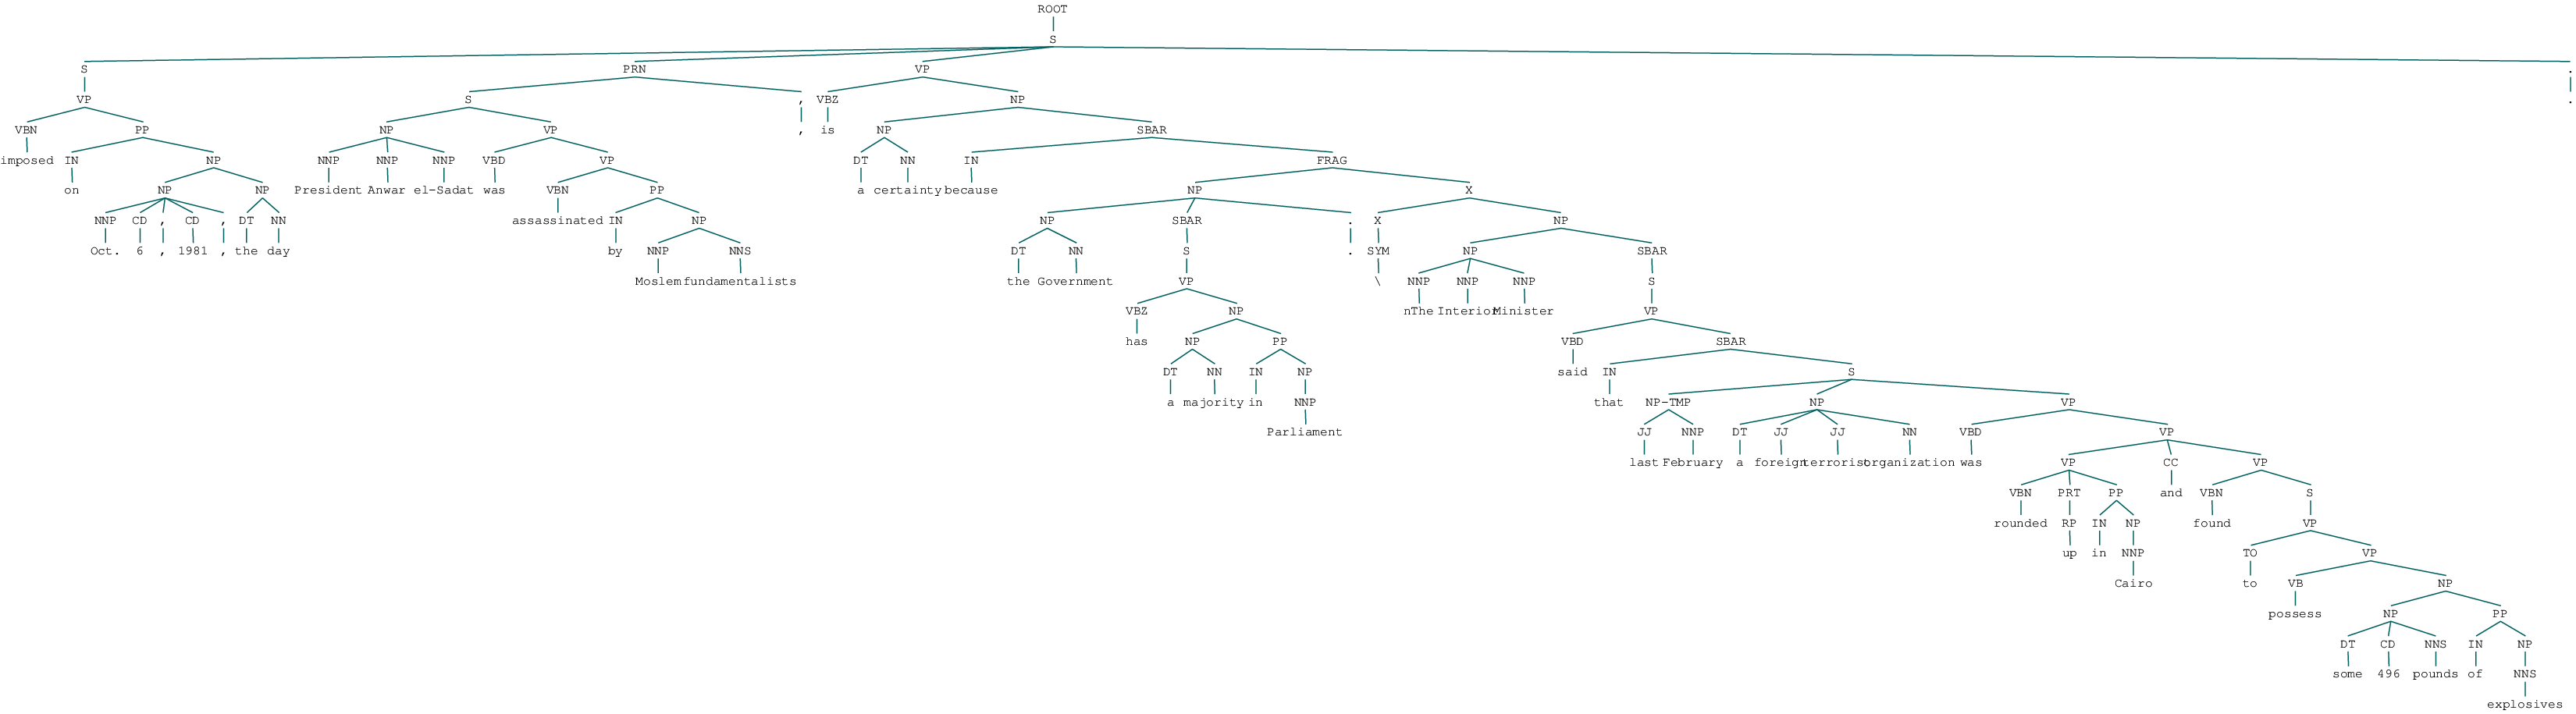

2

'AID = 22553434'

'Code = 186'

"Text = The infamy of one of its offspring - John Wilkes Booth, who assassinated President Lincoln - has overshadowed the fame of one of his brothers, Edwin, whose relationship with the father, Junius Brutus, is the subject of the musical.\\n\\n\\n\\nIt was written by Austin Pendleton, who is usually known as an actor and director; in his last Broadway turn, Mr. Pendleton staged ''The Little Foxes'' with Elizabeth Taylor."

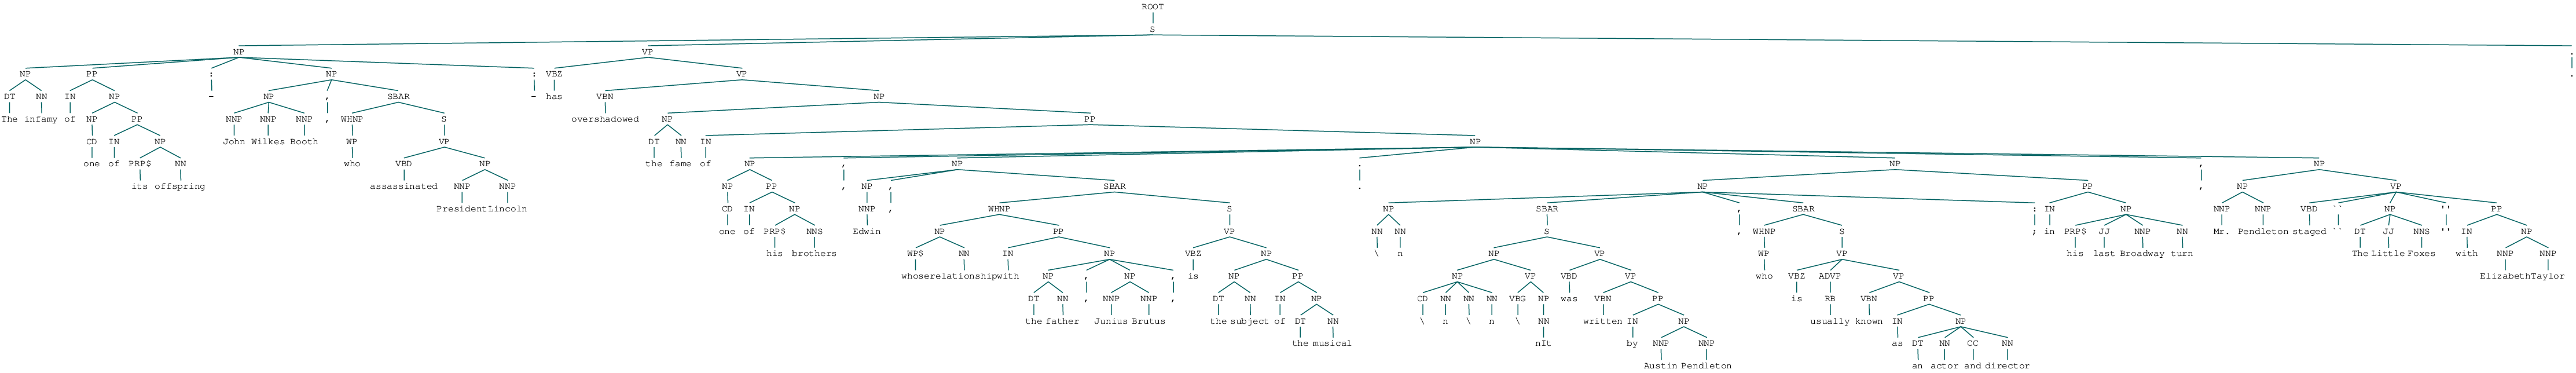

3

'AID = 22633407'

'Code = 186'

'Text = Mrs. Gandhi is assassinated in New Delhi by two gunmen identified by police officials as Sikh members of her own security\\nguard."'

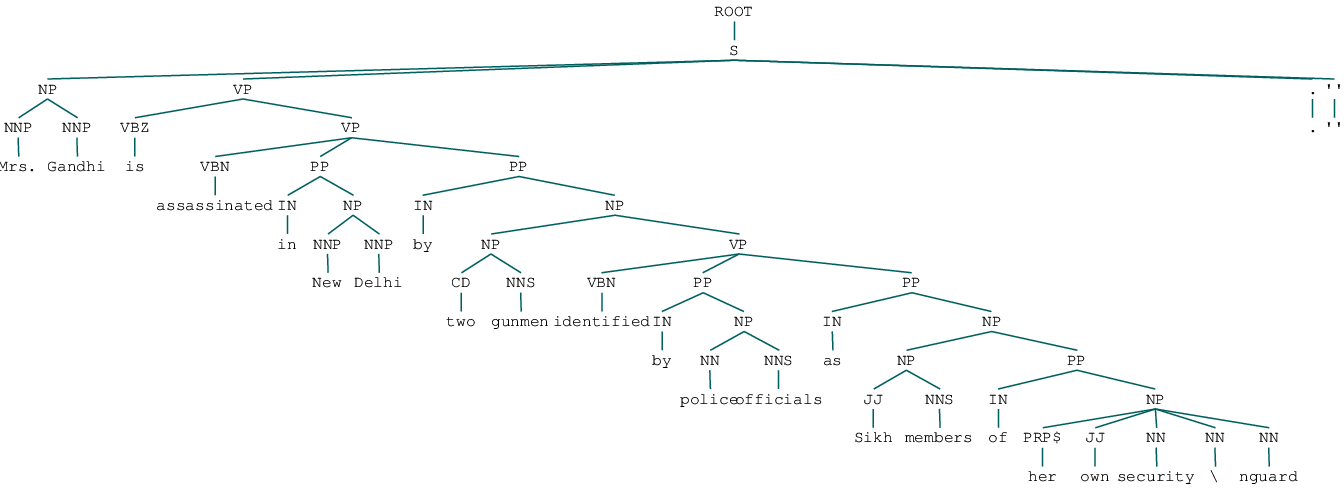

4

'AID = 22693636'

'Code = 186'

"Text = Its interior is a sprawl of brown-brick walls, red carpets and fluorescent lights, possessing not a single clearly Japanese feature in any public room or corridor.\\n\\n\\n\\nTwice in the 1930's, military officers broke into the house to assassinate Prime Ministers, a bit of historical unpleasantness that may explain in part why only 3 of Japan's 16 postwar Prime Ministers have elected to live there."

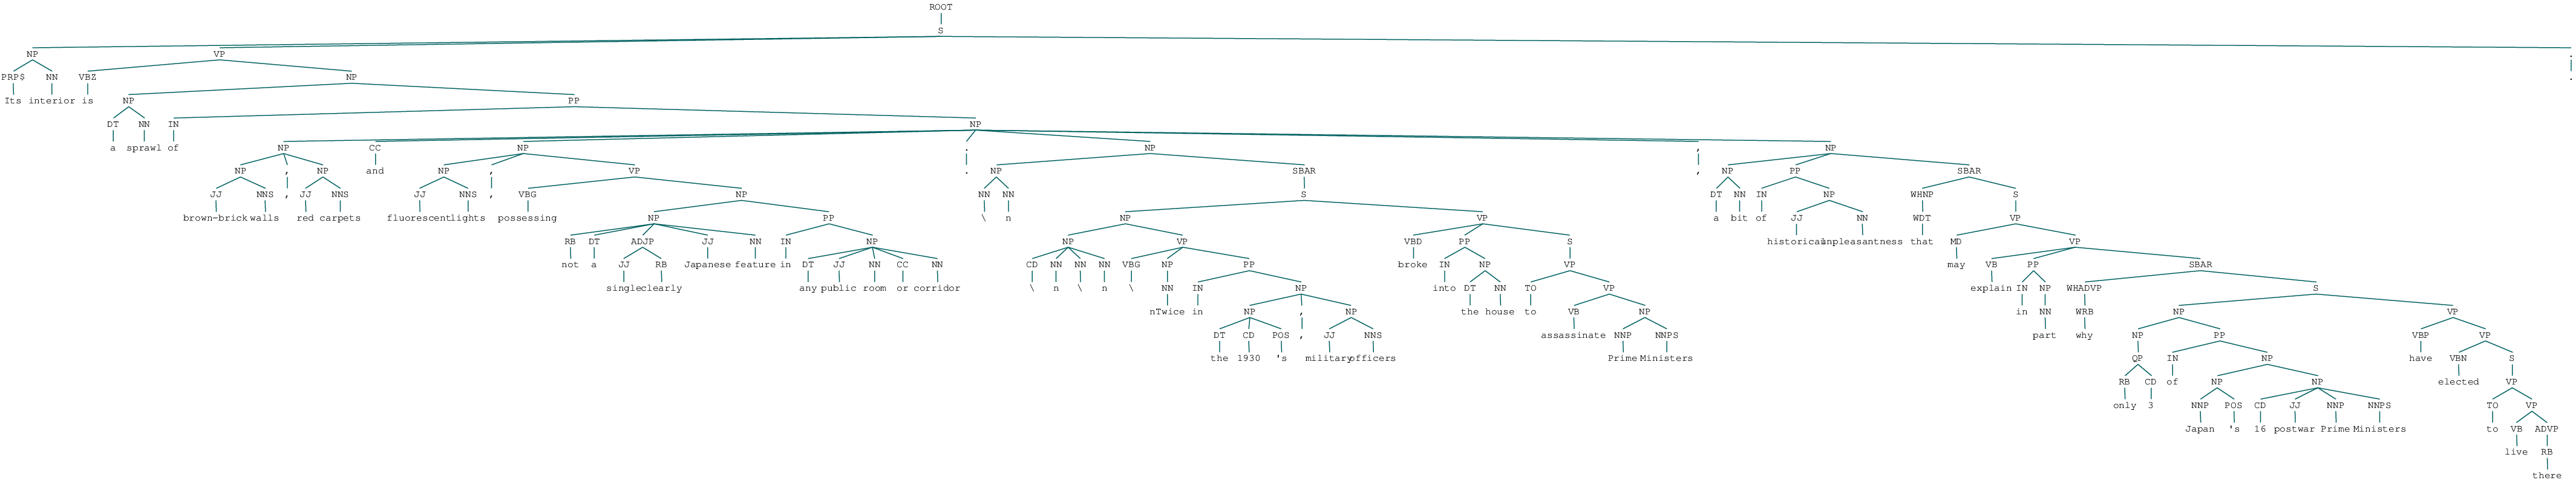

5

'AID = 22729437'

'Code = 186'

"Text = Soviet security people virtually took control of a wing of the presidential palace where the Soviet leader stayed.\\n\\nSoviet officials made no secret of their concern about their leader's safety in a country whose Prime Minister, Indira Gandhi, was assassinated by two of her own security guards in 1984."

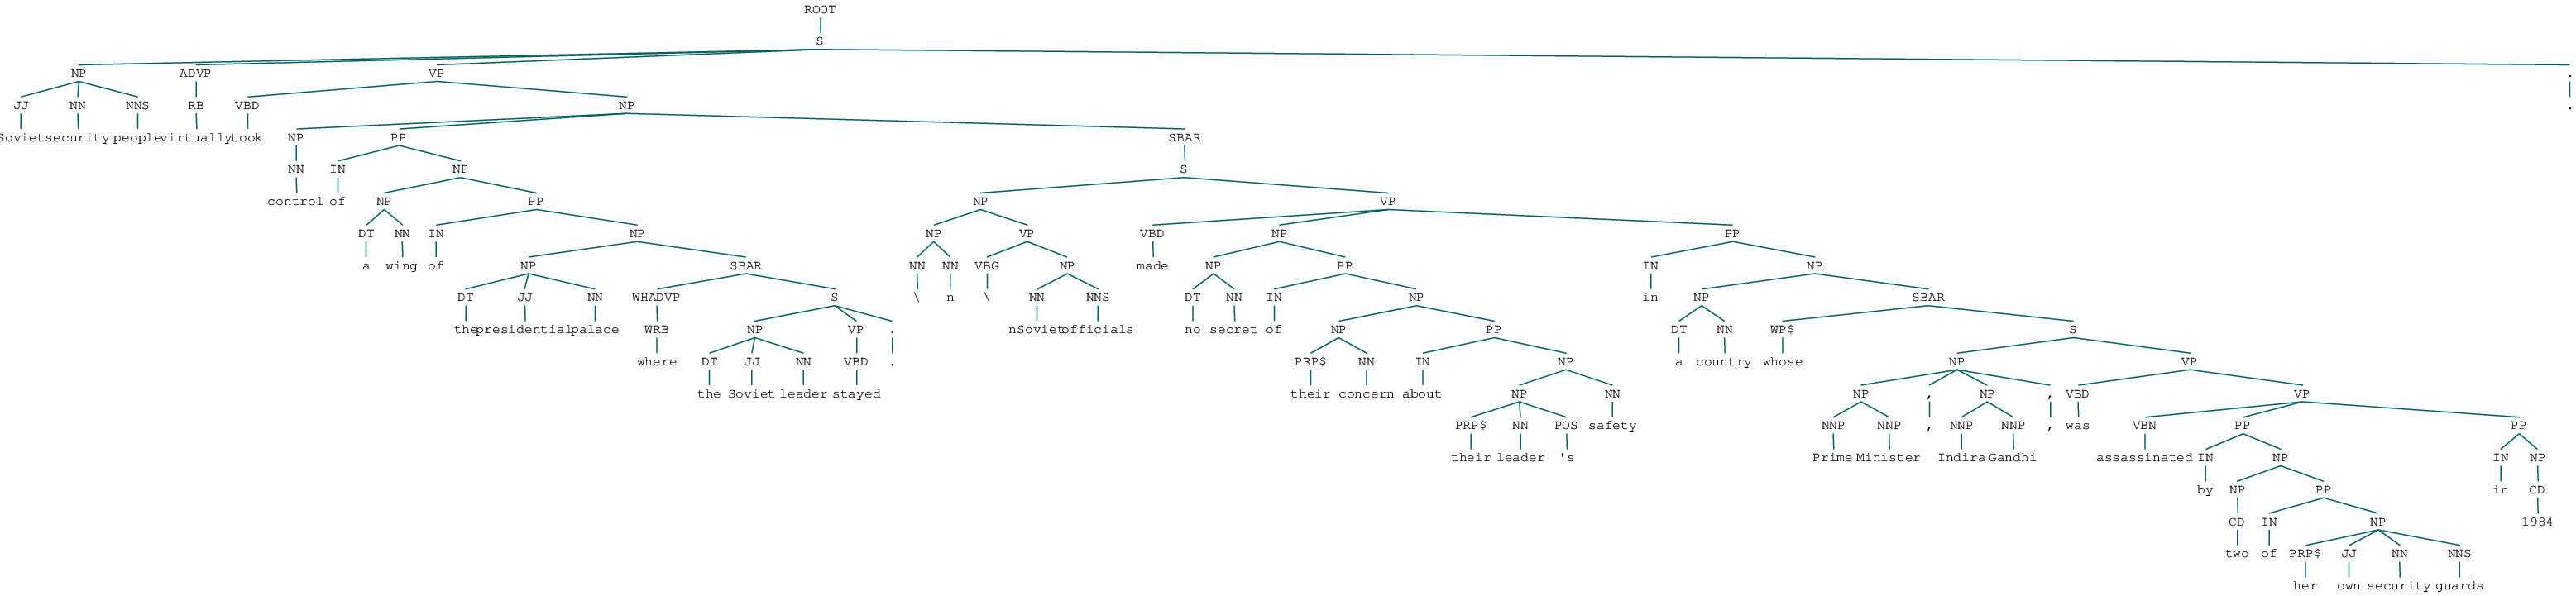

6

'AID = 22778994'

'Code = 186'

"Text = An Indian newspaper suggested that he had been trying to emulate the Hindu extremist who assassinated Mohandas K. Gandhi, India's independence leader, in 1948.\\n\\nOfficials were clearly exercising caution before identifying the suspect's religion for fear of aggravating the already high tensions between Hindus and Sikhs.\\n\\nThousands of people have died in violence between Sikhs and Hindus in the last few years, and Sikh extremists carry out almost daily attacks on Hindus in Punjab state."

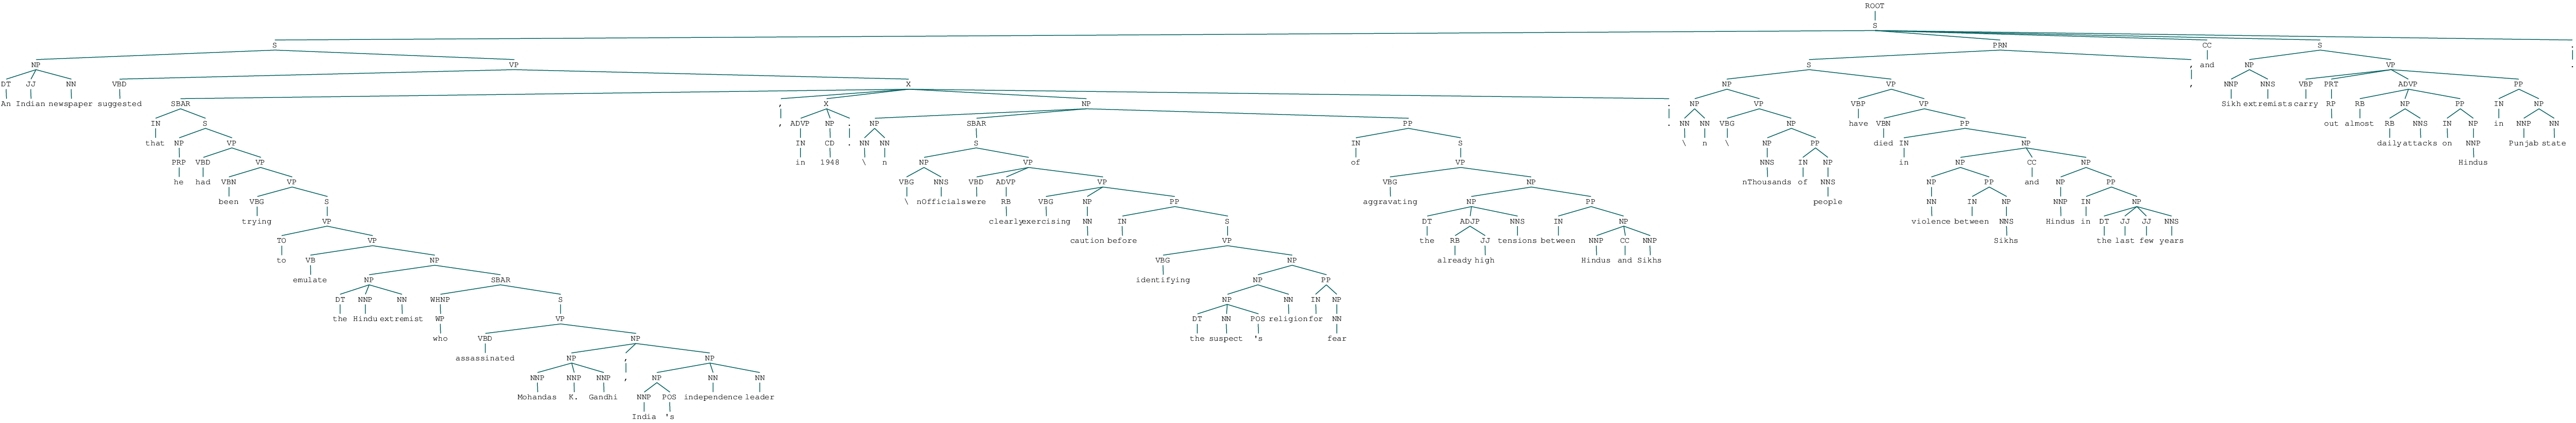

7

'AID = 22924572'

'Code = 186'

'Text = Hosts Are Polite \\n\\nAlthough the Hungarian information outlets have criticized Israeli actions in repressing Palestinian demonstrations in the occupied territories and accused Israel of the assassination of Abu Jihad, the military commander of the Palestine Liberation Organization, Mr. Peres suggested that the Hungarian leaders had not emphasized their opposition.'

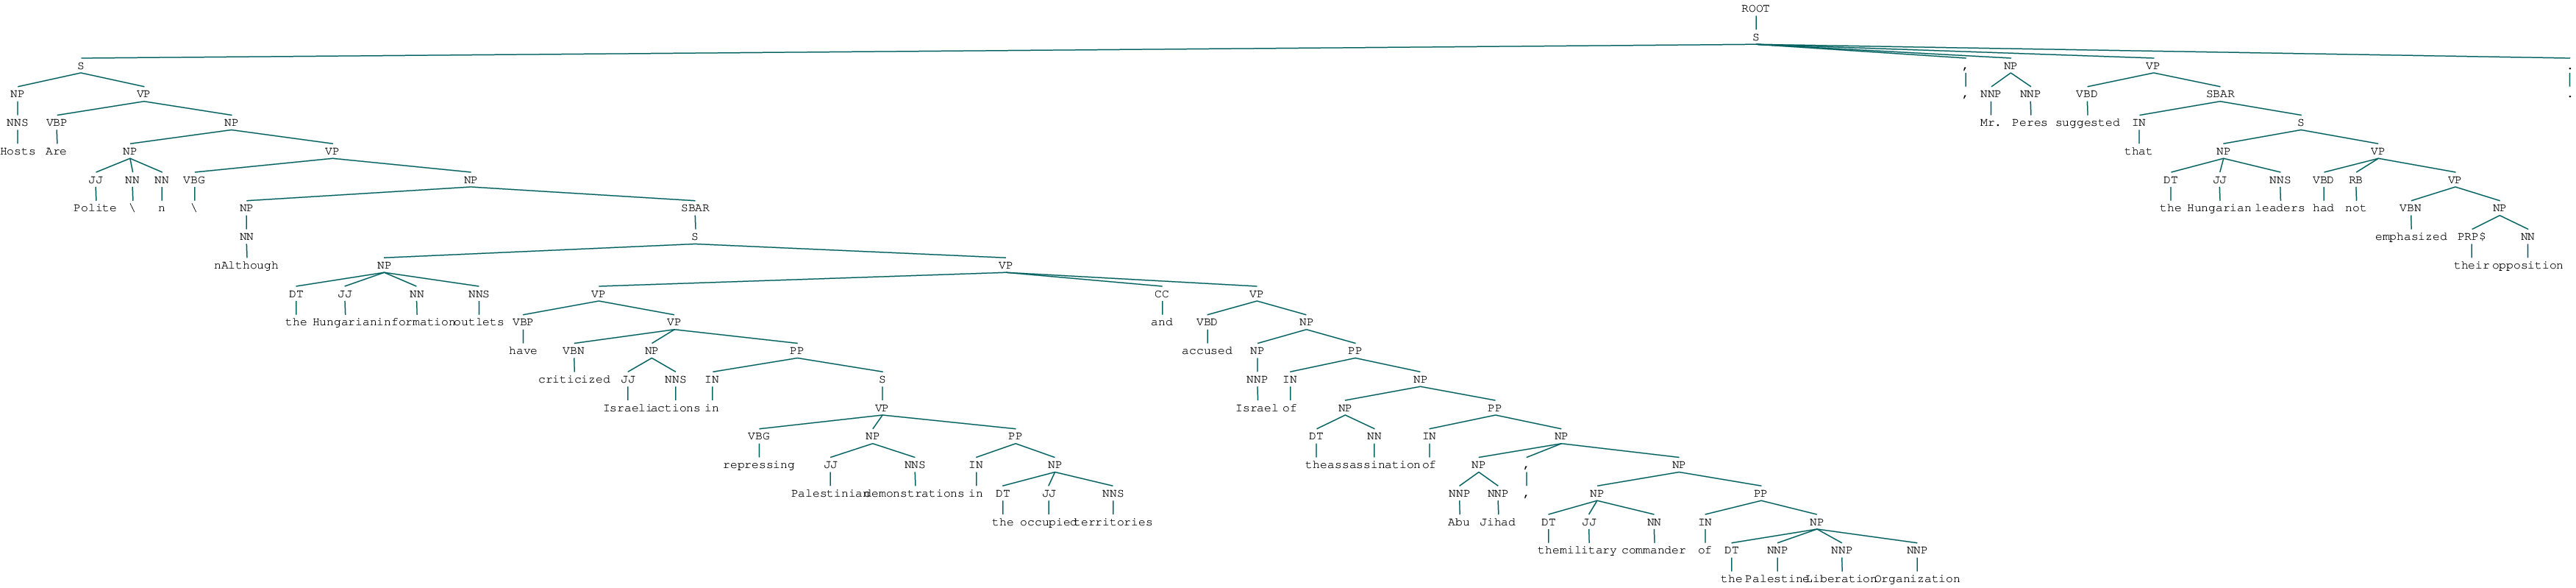

8

'AID = 23161900'

'Code = 186'

'Text = Authorities blame much of the city\'s violence on rivalry between youth gangs working for the Medellin cartel.\\n\\n\\nIn the second shooting, gunmen killed a town councilman and five peasant leaders traveling 50 miles northwest of Bogota, the police said."'

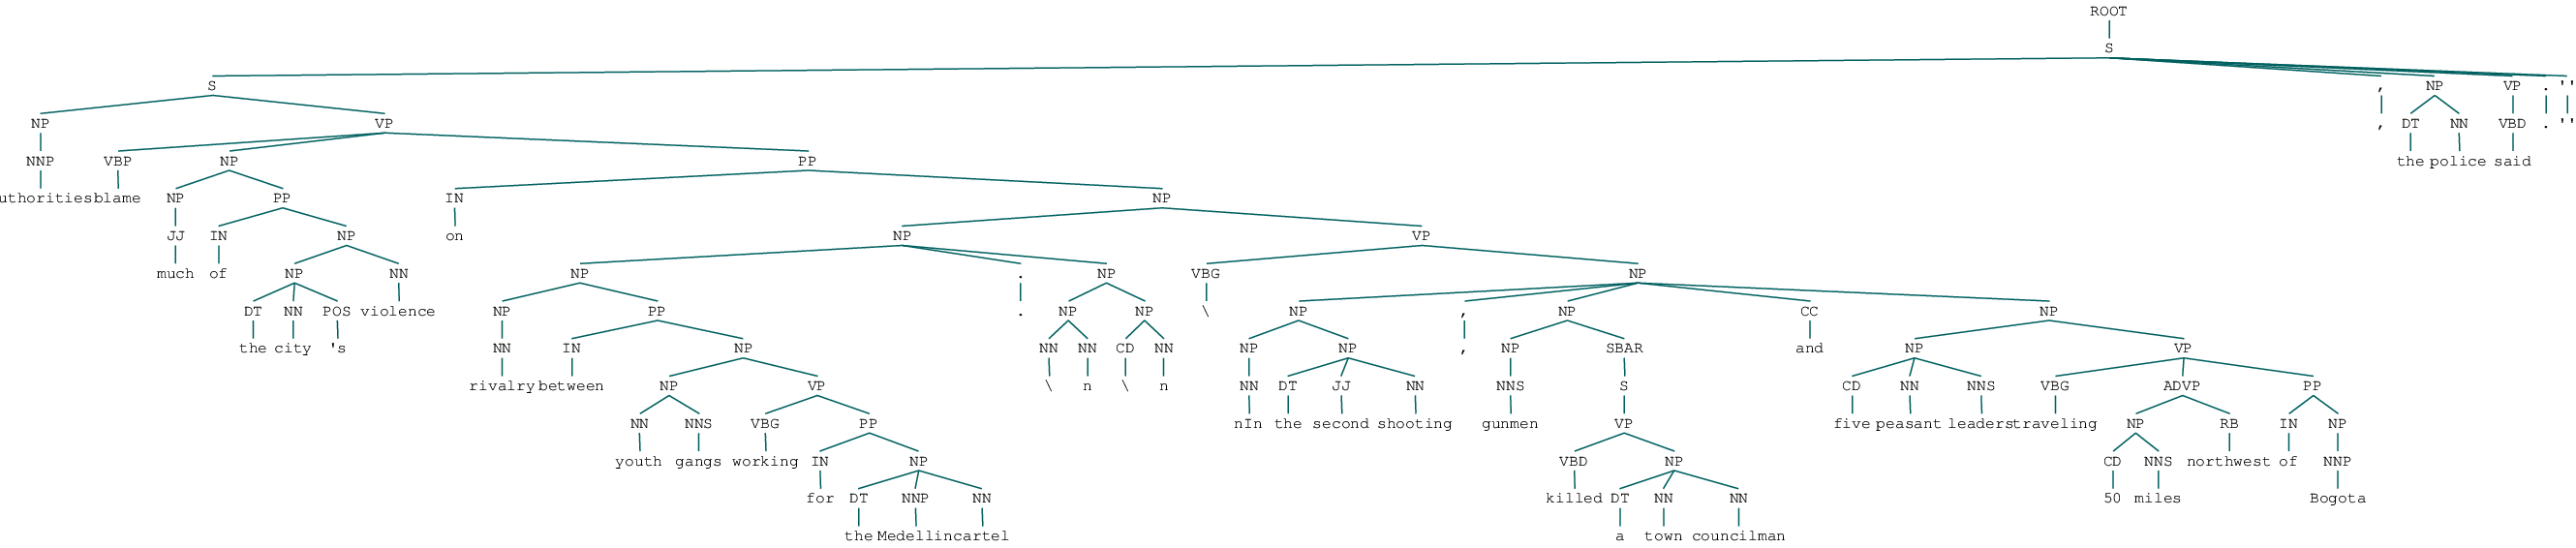

9

'AID = 23812212'

'Code = 186'

'Text = He and his family were assassinated at the palace during a coup in 1978 by soldiers loyal to Taraki.\\n\\n\\n1978\\nNOOR MOHAMMAD TARAKI\\n\\nKnown for being cruel and crude, he lasted about a year until he was assassinated by being suffocated to death on the orders of his vice president.'

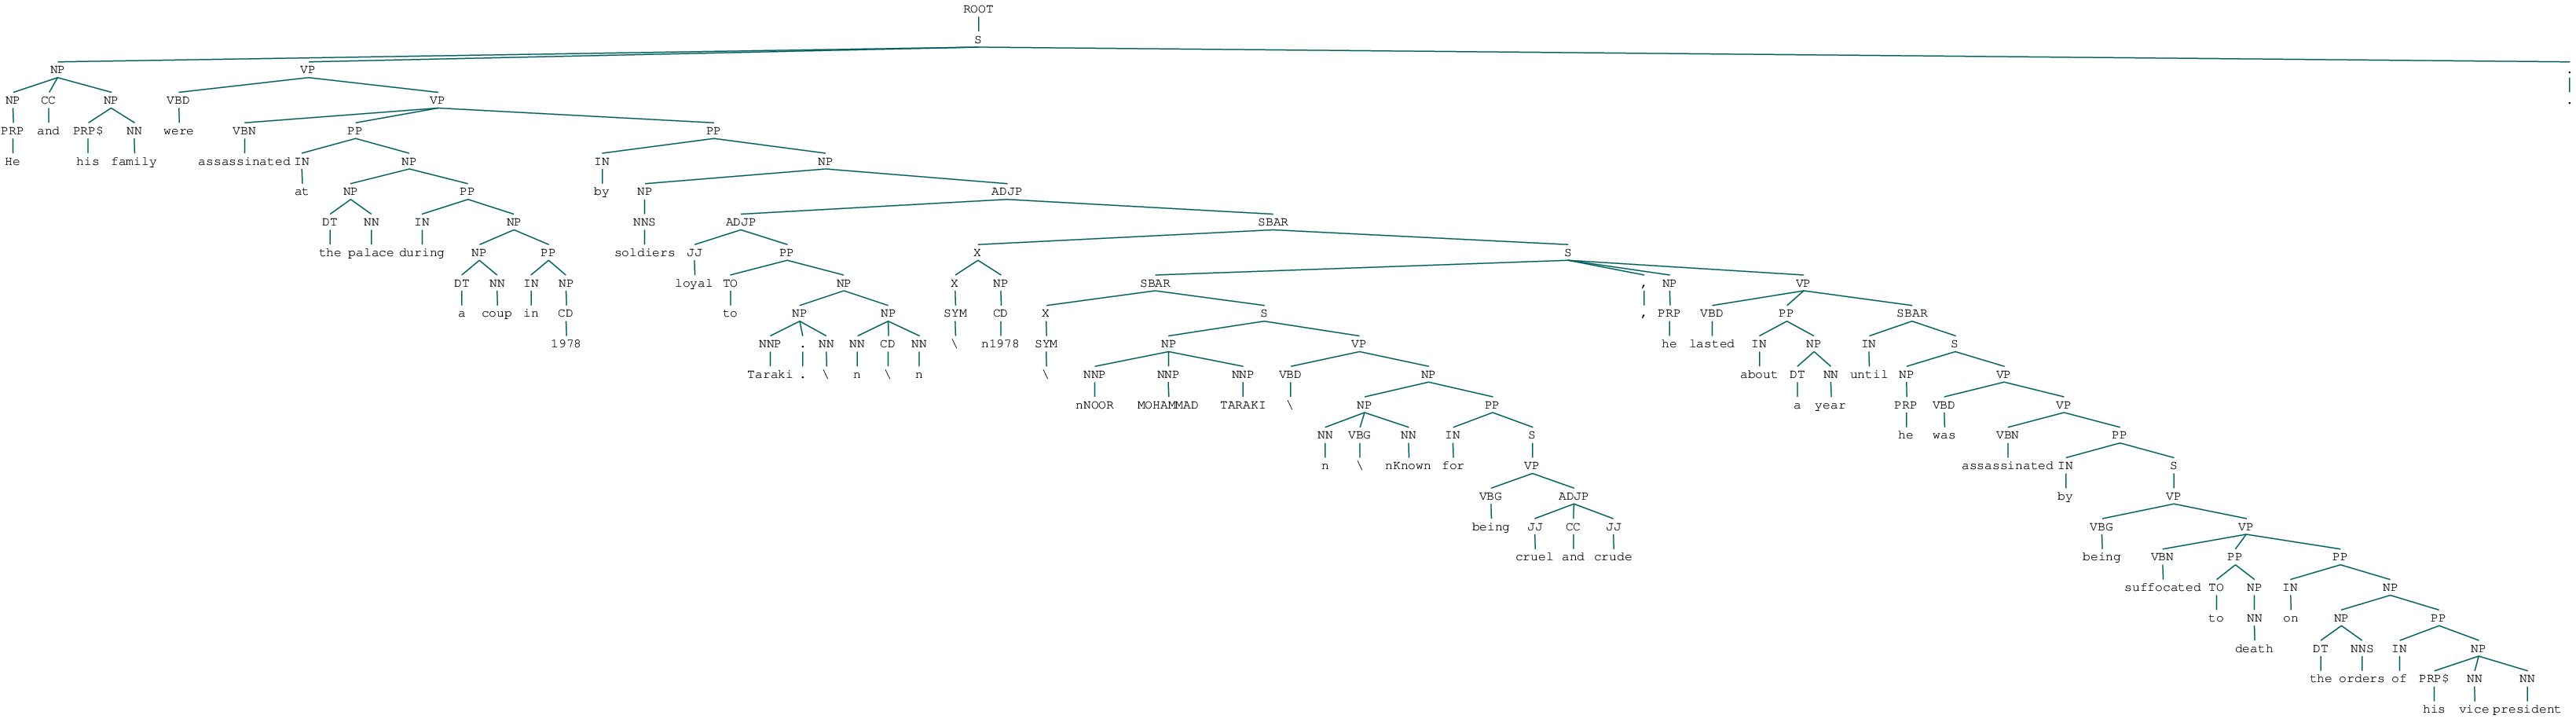

10

'AID = 23843992'

'Code = 186'

"Text = There is also talk of creating a parliament or assembly to include more groups in the government.\\n\\n\\nSome critics have complained that Mr. Karzai's government has been slow in confronting regional warlords and tracking down officials who assassinated a government minister this winter.\\nBut if Mr. Karzai can deliver stability,"

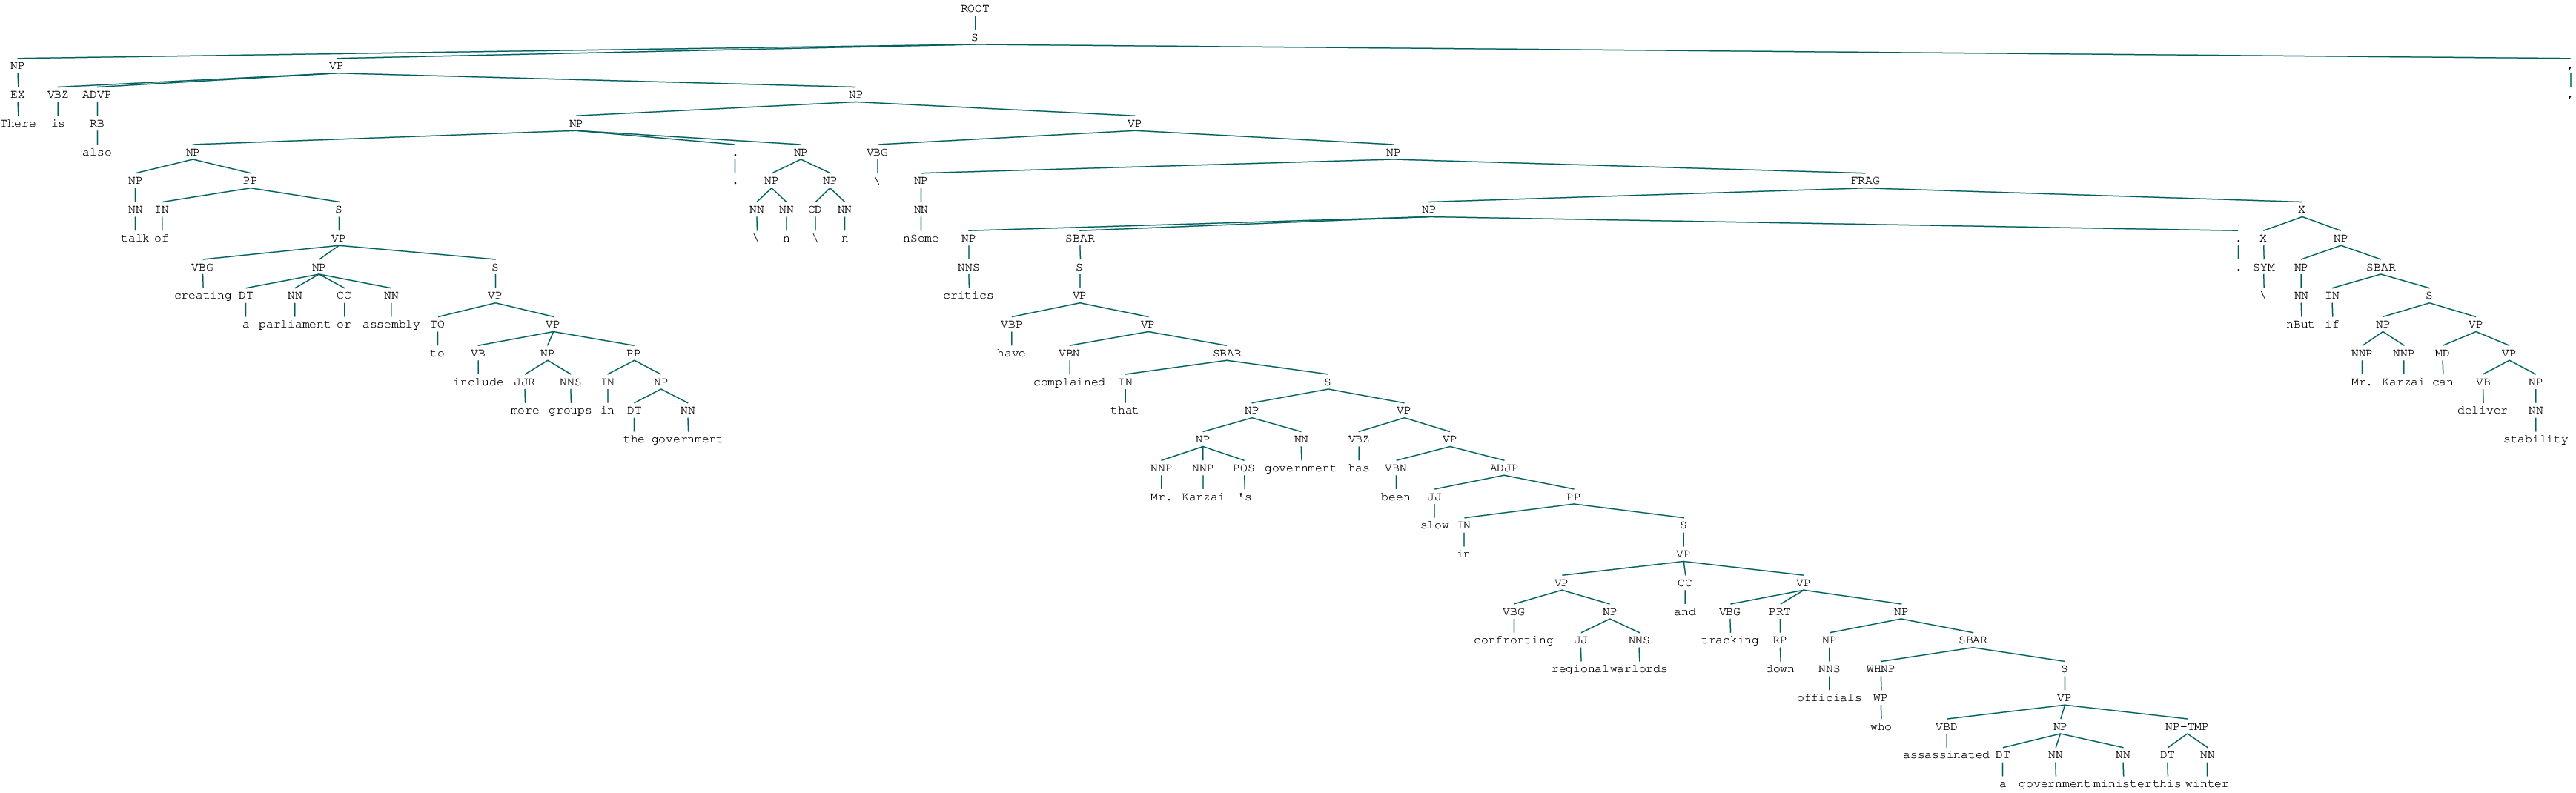

11

'AID = 23878274'

'Code = 186'

'Text =  Nasr Jarrar, was holed up, to pass on a demand that he surrender.\\n\\n\\n\\nThe 19-year old youth, Nidal Abu Mohsen, was shot dead approaching the house -- each side accused the other of shooting -- and the Israelis blasted the house, killing the Hamas leader in the rubble.'

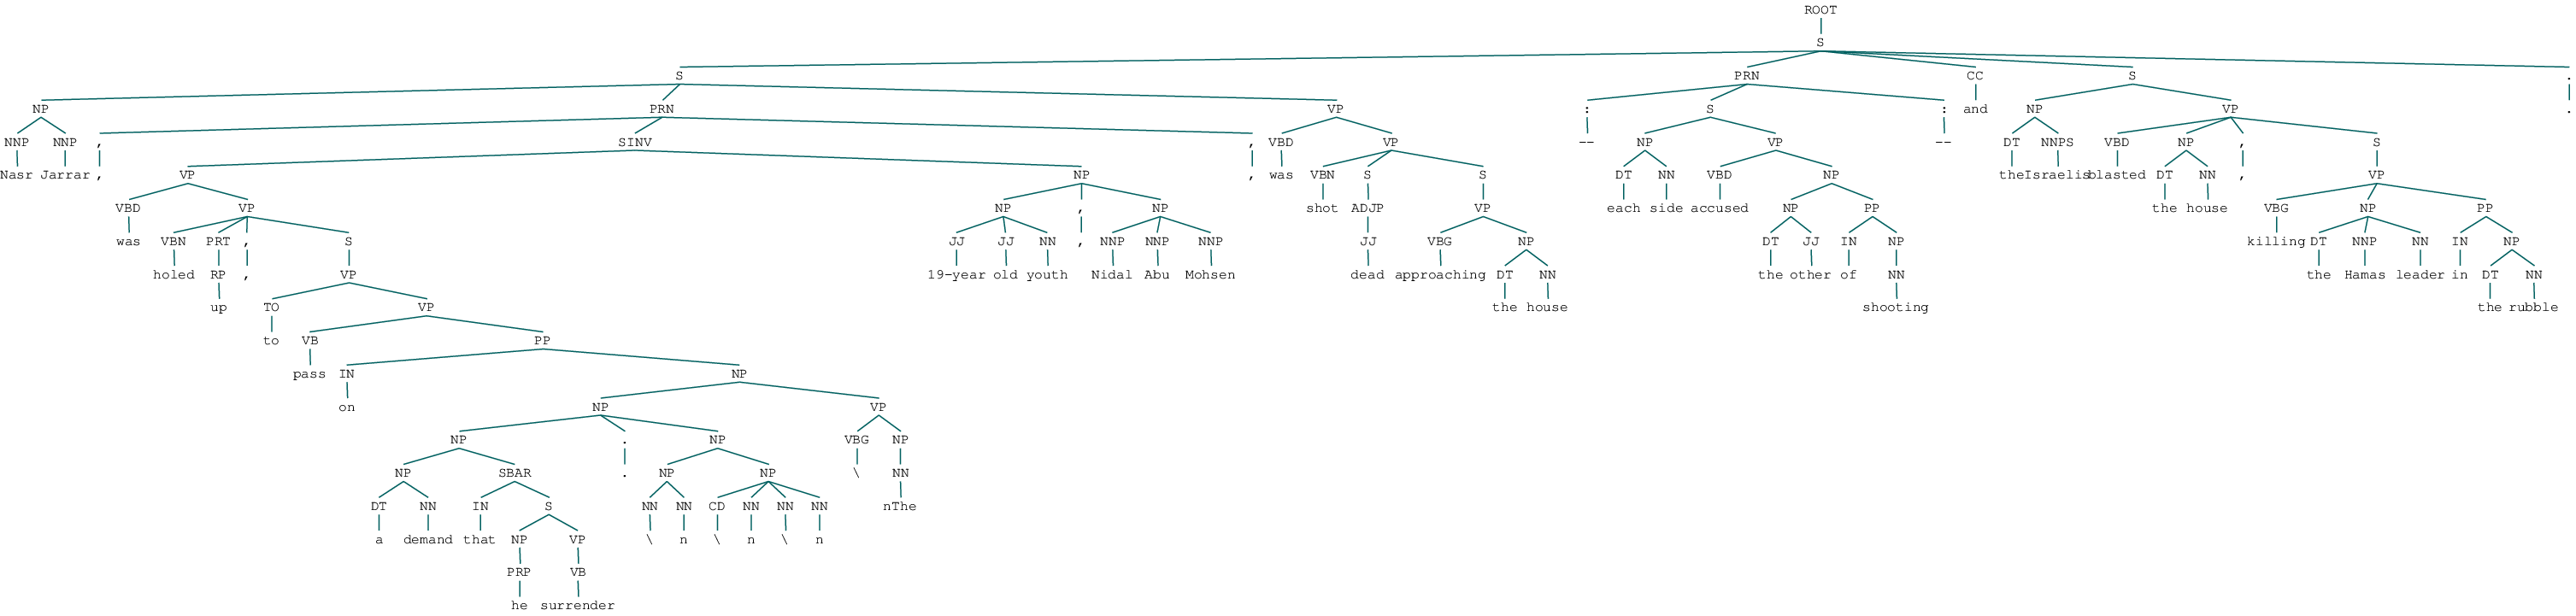

12

'AID = 23949205'

'Code = 186'

'Text = But Tutsi extremists assassinated the new president four months later.\\n\\n\\n Credit: AP"'

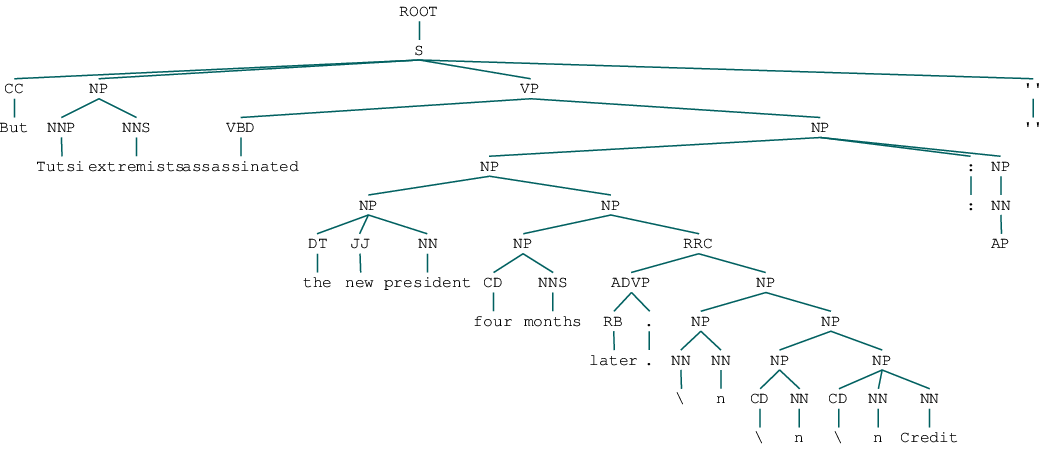

13

'AID = 24035919'

'Code = 186'

"Text = Mr. Nichols, who the police say killed a judge, a court reporter and a deputy sheriff at the courthouse on Friday and an off-duty federal customs agent later, gave up peacefully.\\n\\n\\n''I honestly think when I looked at him that he did not want to do it anymore,'' Ms. Smith said in a statement broadcast Sunday evening on CNN.\\nMs. Smith said Mr. Nichols took her hostage outside her apartment when she returned from a store about 2 a.m."

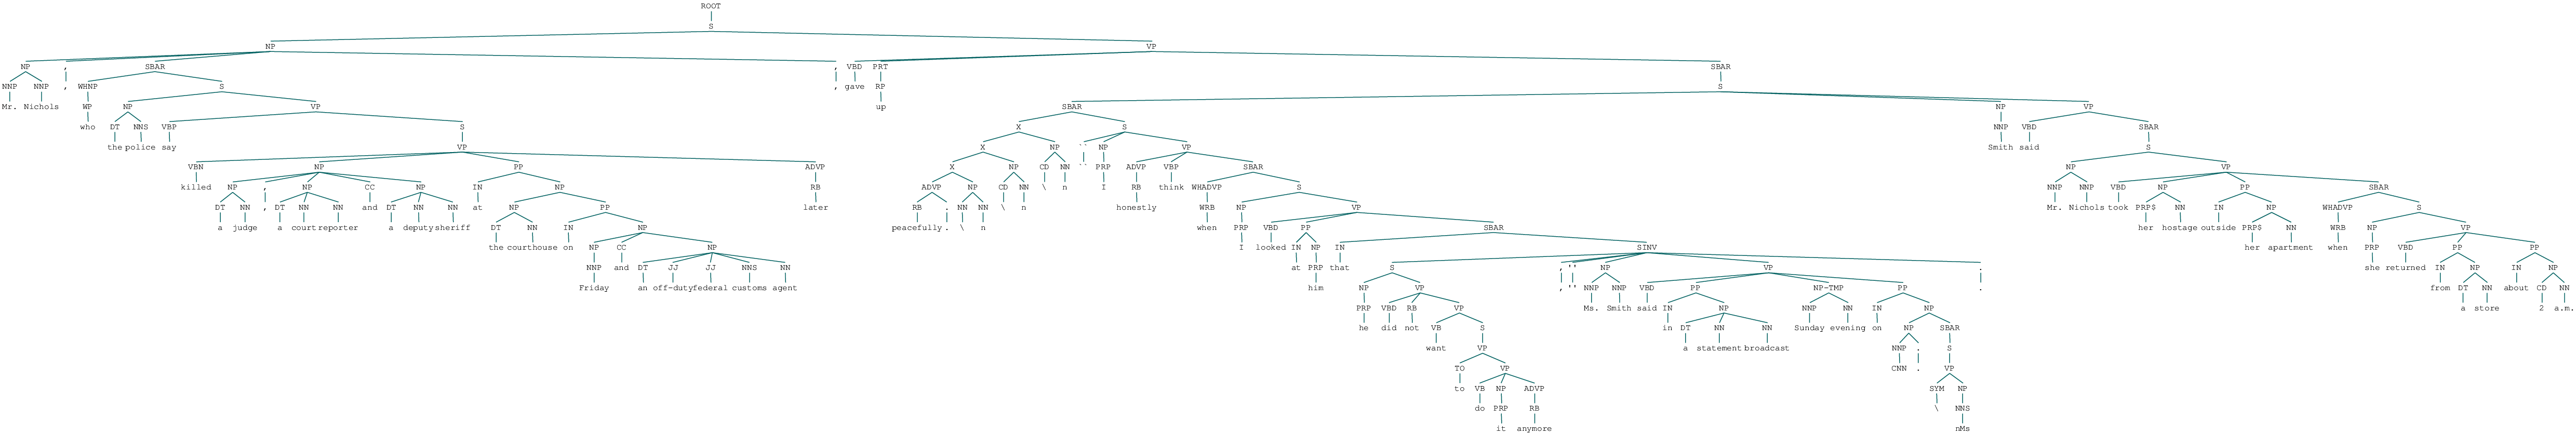

14

'AID = 24049709'

'Code = 186'

"Text =  who cooperated with the Israelis' invasion in 1982 and was elected president behind their tanks.\\n\\n\\n\\nThe assassination of former Prime Minister Rafik Hariri in February set off the tumultuous chain of events -- including rallies calling for an end to Syrian occupation that eventually drew a million and a half Lebanese across religious divides -- that forced the Syrian president, Bashar al-Assad, to end his country's 29-year occupation."

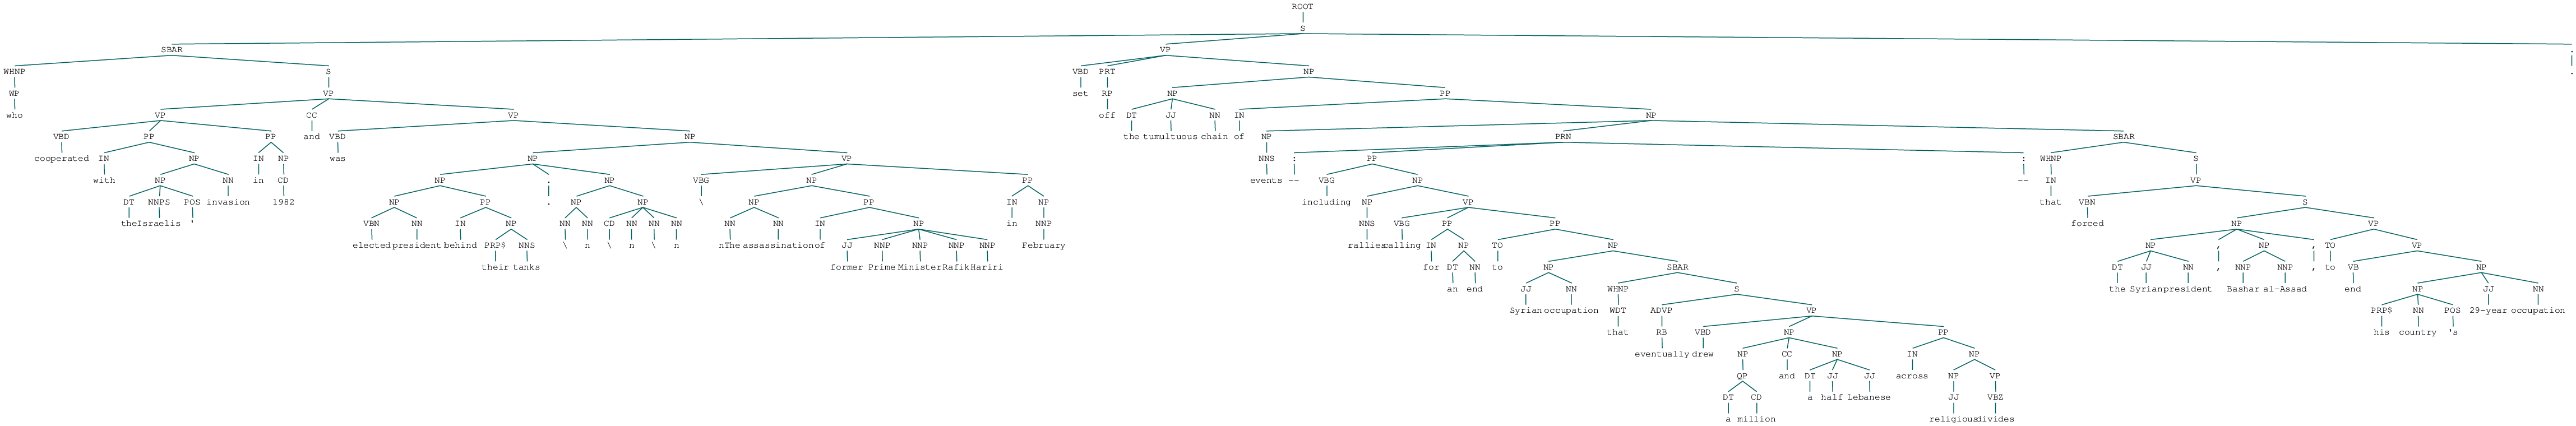

15

In [72]:
for i in range(len(accent6_186)):
    parsed_output(accent6_186, i)
    display(i)

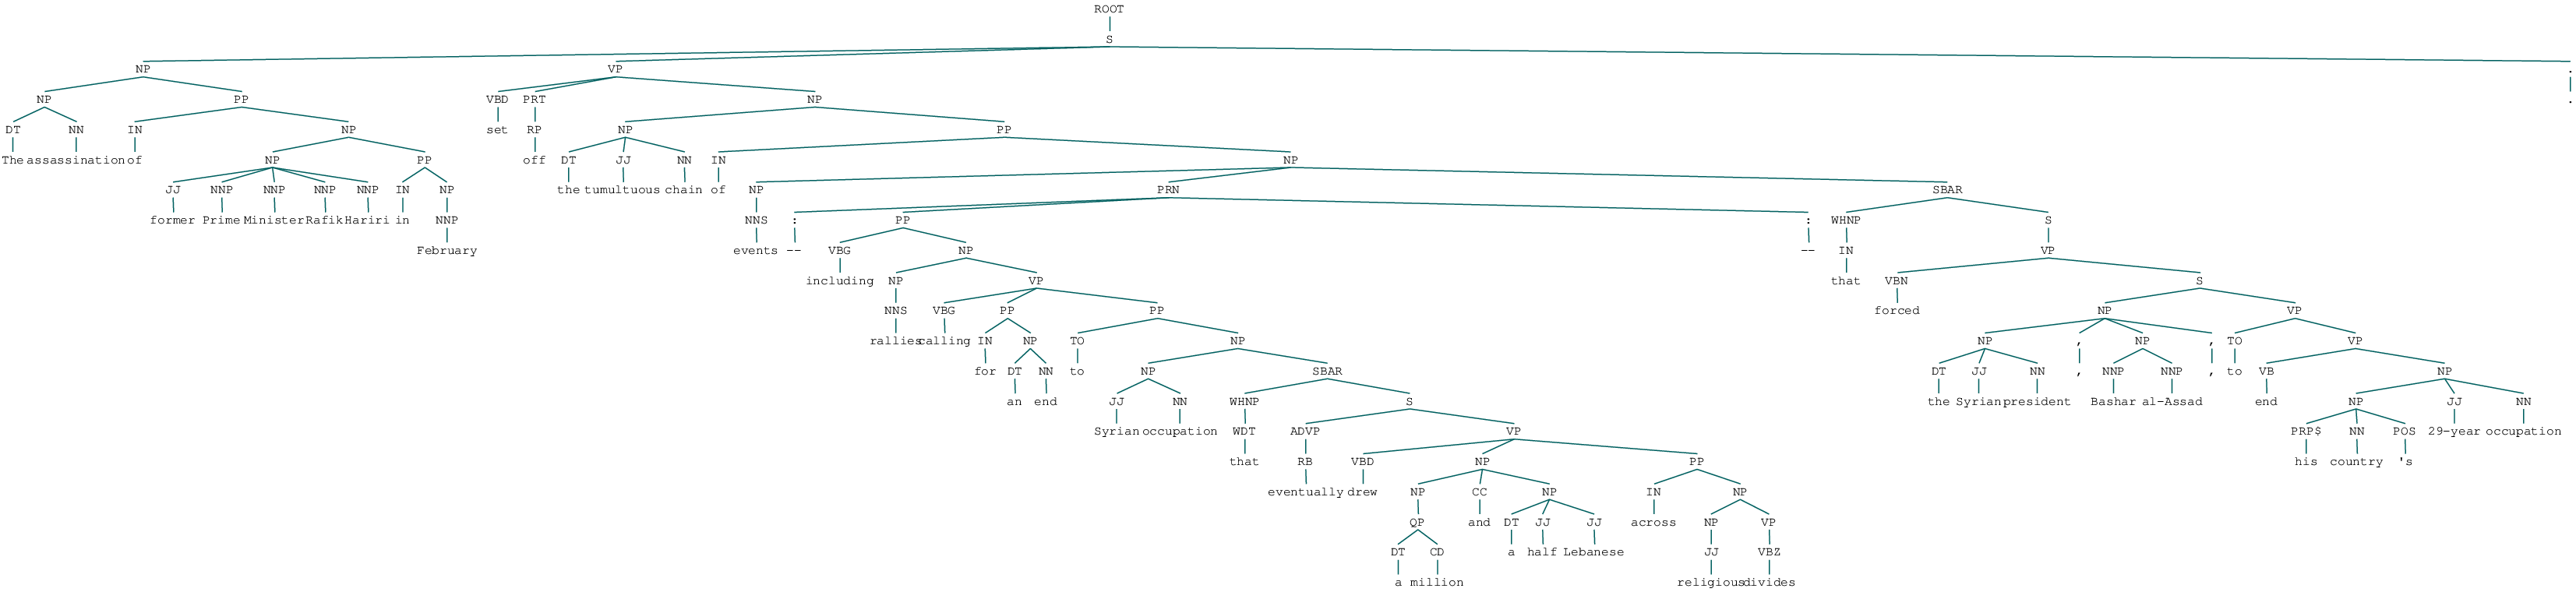

In [86]:
one_sentence_parser("The assassination of former Prime Minister Rafik Hariri in February set off the tumultuous chain of events -- including rallies calling for an end to Syrian occupation that eventually drew a million and a half Lebanese across religious divides -- that forced the Syrian president, Bashar al-Assad, to end his country's 29-year occupation.")

## NYTbd Sample 5 Run 2

In [6]:
petrarch5_run2_full = pd.read_stata("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 5/Sample5_run2/NYTbd_sample5_run2_events_text.dta")

In [9]:
# Convert Data Types to int32
petrarch5_run2_full['code'] = petrarch5_run2_full['code'].astype('int32')
petrarch5_run2_full['aid'] = petrarch5_run2_full['aid'].astype('int32')

# trim petrarch5_full down to relevant codes
petrarch5_run2 = petrarch5_run2_full[petrarch5_run2_full['code'].isin(relevant_codes)]

In [13]:
# set index on AID and Code
petrarch5_run2_index = petrarch5_run2.set_index(keys).index

# Produce df's of mutually exclusive events 
petrarch5_run2_only = petrarch5_run2[~petrarch5_run2_index.isin(petrarch5_index)]

In [14]:
petrarch5_run2_only

,code,text,aid
1,1823,"In a separate incident , the police said , an ...",23550887
111,1711,Indian customs officials seized 21 tons of sil...,22373265
165,1823,"In Tel Aviv , two Israelis were stabbed to dea...",23255640
194,1823,A Maryland laborer has been charged with beati...,23735670
202,1823,Two unidentified blacks beat a British mission...,22444326
354,1711,"For example , the famous Benin bronzes were se...",23449664


In [17]:
len(petrarch5)
len(petrarch5_run2)

24

27

In [23]:
relevant_aids = petrarch5_run2_only.aid.unique()

In [25]:
test = petrarch5[petrarch5['aid'].isin(relevant_aids)]

In [26]:
test

,code,text,aid
101,182,"In Tel Aviv , two Israelis were stabbed to dea...",23255640
168,182,A Maryland laborer has been charged with beati...,23735670
386,182,"In a separate incident , the police said , an ...",23550887


In [28]:
petrarch5_run2_only['parsed'] = core_parser(petrarch5_run2_only, 'text')
petrarch5_run2_only['dep'] = dep_parser(petrarch5_run2_only, 'text')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


'AID = 23550887'

'Code = 1823'

'Text = In a separate incident , the police said , an off-duty policeman was beaten to death early this morning by Protestant men outside a bar in the Protestant town of Ballymoney , north of Belfast .'

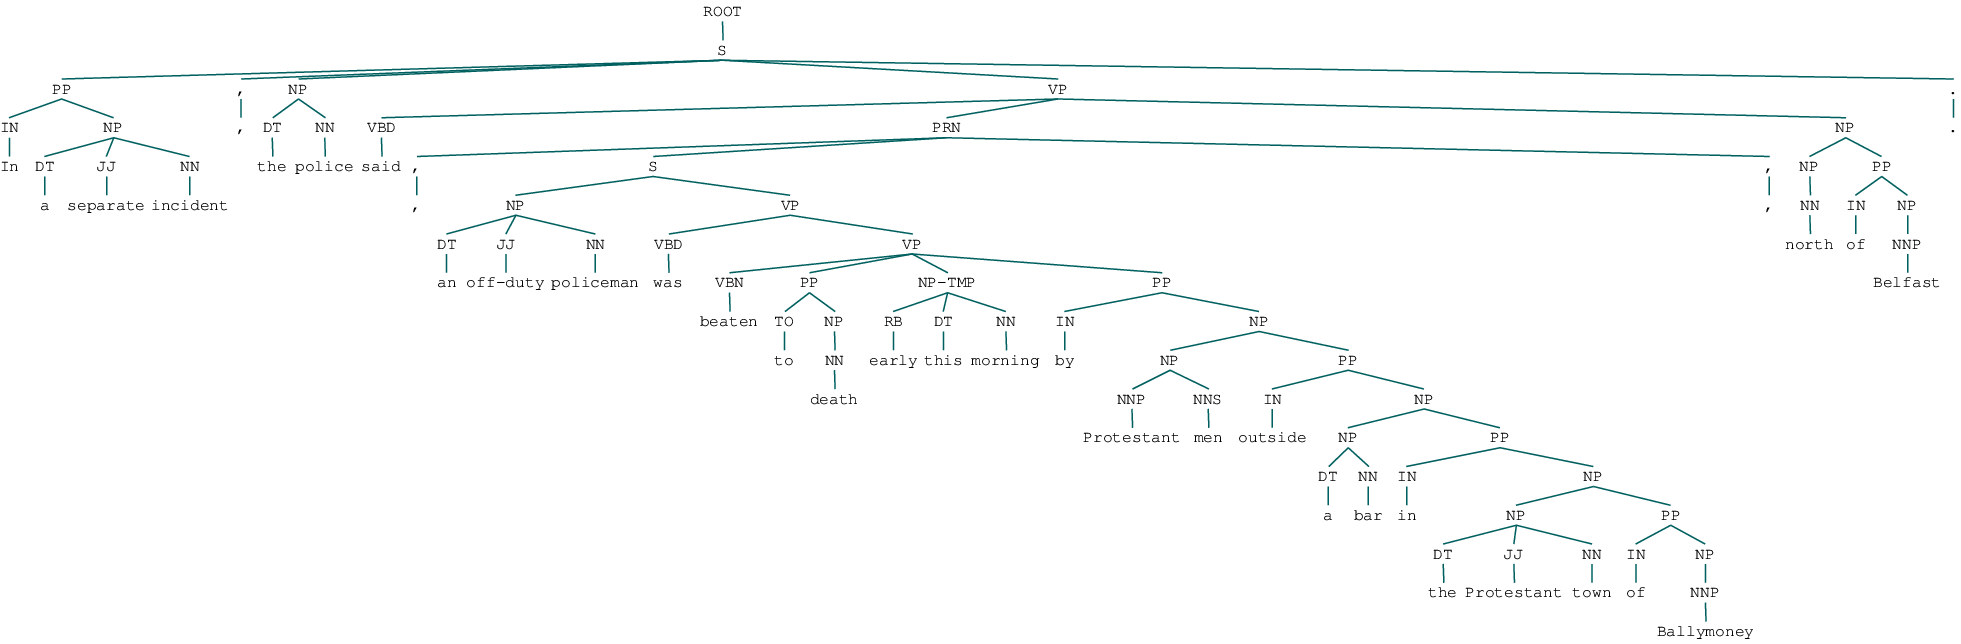

0

'AID = 22373265'

'Code = 1711'

'Text = Indian customs officials seized 21 tons of silver from smugglers during the first six months of 1980 , it was announced today .'

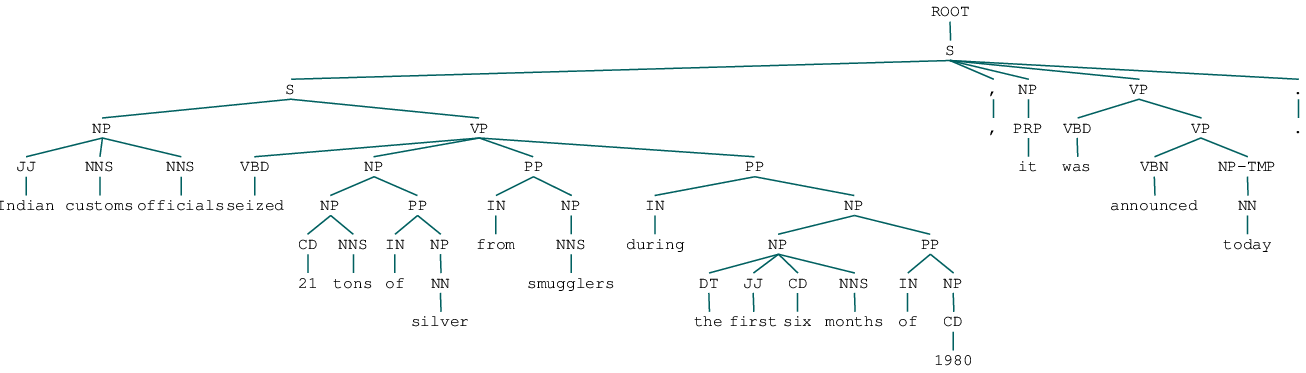

1

'AID = 23255640'

'Code = 1823'

'Text = In Tel Aviv , two Israelis were stabbed to death by a young Palestinian on a knife-wielding rampage .'

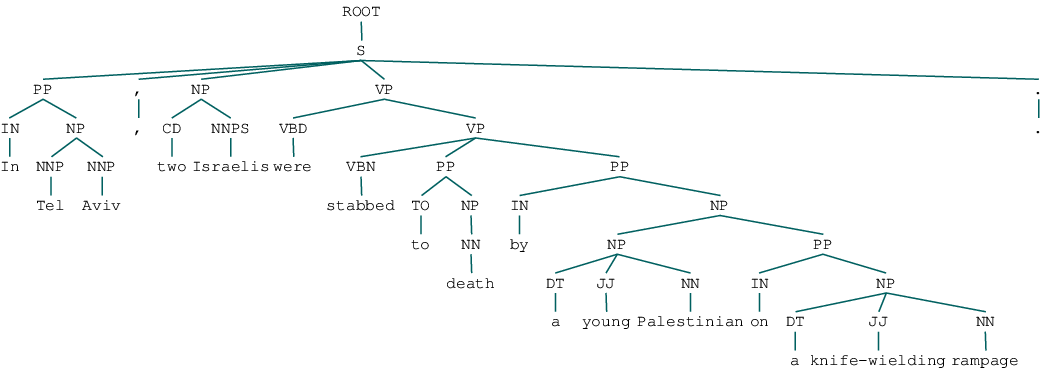

2

'AID = 23735670'

'Code = 1823'

'Text = A Maryland laborer has been charged with beating and stabbing to death a priest who surprised an intruder in the rectory of his church .'

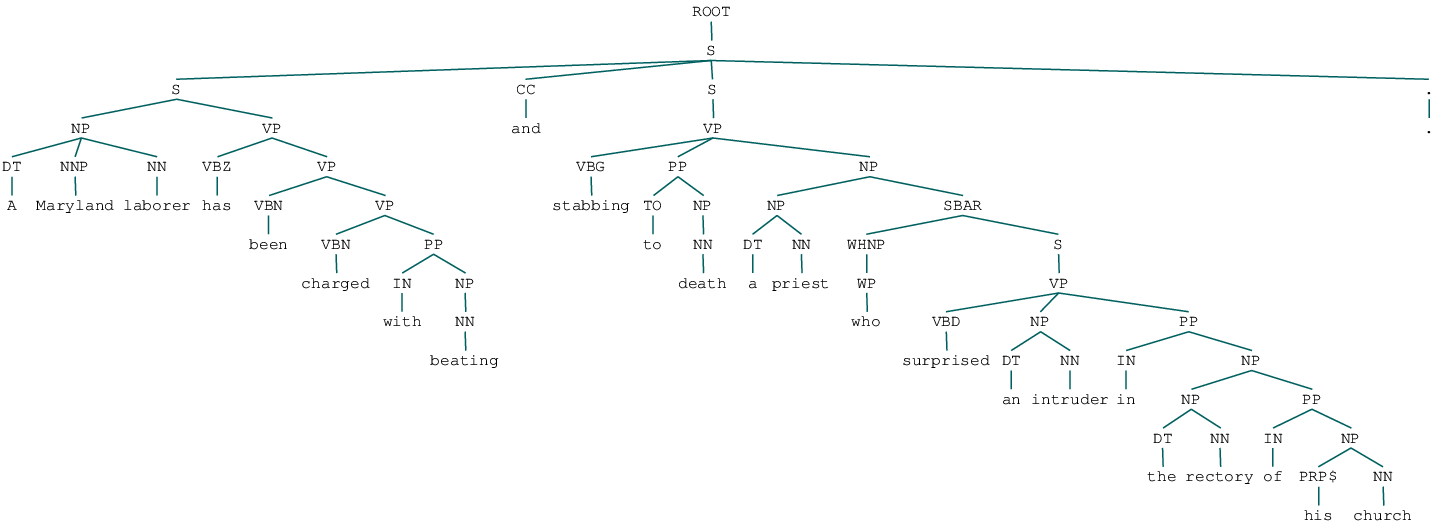

3

'AID = 22444326'

'Code = 1823'

'Text = Two unidentified blacks beat a British missionary couple to death in Zimbabwe last night , apparently in revenge for a South African raid into neighboring Mozambique , a church spokesman said today .'

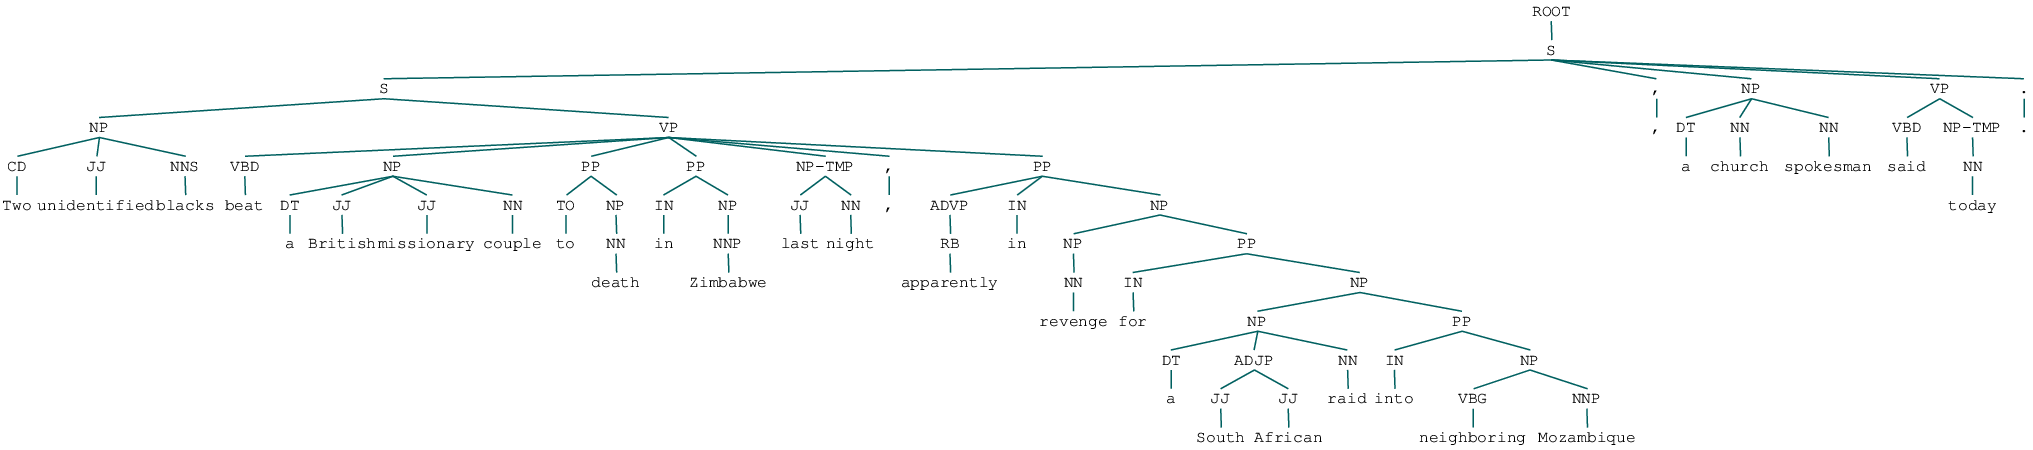

4

'AID = 23449664'

'Code = 1711'

'Text = For example , the famous Benin bronzes were seized by British forces during a punitive raid in 1897 ; Nigeria has long sought their restitution .'

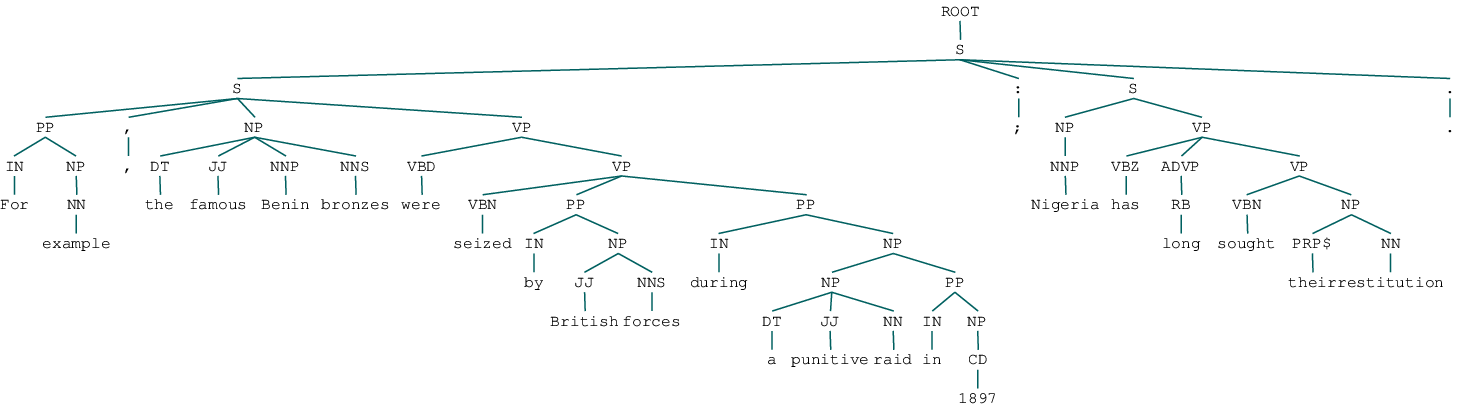

5

In [29]:
for i in range(len(petrarch5_run2_only)):
    parsed_output(petrarch5_run2_only, i)
    display(i)

In [4]:
import sys

In [5]:
sys.executable

'/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8'